# Problem Statement: GreatStone Mutual Fund Rating

Great Stone Rating is a star based ranking system. These ratings are based on the performance of a mutual fund with adjustments for risks and costs as compared to other funds in the same category. The rating ranges from 0 to 5.

Goal: 
The goal of this hackathon is to predict GreatStone’s rating of a mutual fund. In order to help investors decide on which mutual fund to pick for an investment, the task is to build a model that can predict the rating of a mutual fund. The various attributes that define a mutual fund can be used for building the model.

Dataset Information:
This dataset comprises information of 25000 mutual funds in the United states. Various attributes related to the mutual fund have been described and these attributes will be used for making decisions on the rating of the mutual fund by GreatStone which is a top mutual fund rating agency. The following files are provided in the form of CSVs. These files contain various attributes related to the mutual fund. 

Files Description:
1. bond_ratings consists of 12 columns which provide information on the bond rating percentage allocation of the mutual funds
2. fund_allocations consists of 12 columns which provide information on the sector wise percentage allocation of the mutual funds
3. fund_config comprises of 4 columns which comprise the metadata of the mutual funds
4. fund_ratios consists of 8 columns which provides information on various fundamental ratios that describe the mutual funds
5. fund_specs contains 9 columns which give information about the specifications of the mutual funds
6. other_specs contains 43 columns which give information of the other aspects of the mutual funds
7. return_3years contains 17 columns which give information about 3 year return and ratios
8. return_5years contains 17 columns which give information about 3 year return and ratios
9. return_10years contains 17 columns which give information about 3 year return and ratios
10. sample_submission contains the fund ids for which you need to provide the ratings for the submission file. Please maintain the order of the fund ids as shown in this file.
11. The tag column is a unique identifier and is also the same as the id.(i.e tag = id)
NOTE: File 1 to 9 have been clubbed together into one single csv file named "GSMF_Rastings"

Train and Test Data:
The train and test data are both provided in the CSVs described above as part of the same file. You need to segregate the training and test data based on where the greatstone ratings are provided. Go through the files carefully to understand how you
can segregate both the datas. Please maintain the ordering of the test data. You can use the sample submission file in order to get ID of the test data.

Evaluation Metric:
Mean Precision Value - Mean of precision of all the classes = P1+P2….. P6/6 Here P1 is Precision of Class 1 and P2 is Precision of Class2 and so on and so forth.

In [11]:
#importing libraries
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
sns.set(style = 'darkgrid')
from IPython.display import HTML, display
from IPython.core import display as ICD
from pandas.plotting import scatter_matrix
pd.options.display.max_columns = None
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings
import scikitplot as skplt
warnings.filterwarnings('ignore')

#import machine learning
from sklearn import model_selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



from sklearn.feature_extraction.text import CountVectorizer  
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system


warnings.filterwarnings("ignore")

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

ModuleNotFoundError: No module named 'scikitplot'

# Load Data and Initial Analysis

In [13]:
gs_df1 = pd.read_csv("GSMF_train.csv")
gs_df1.head()

C:\Users\PAU\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (29,67,82,105) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tag,fund_id,category,parent_company,fund_name,greatstone_rating,aaa_rating,aa_rating,a_rating,bbb_rating,bb_rating,b_rating,below_b_rating,others_rating,maturity_bond,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,investment_class,currency,total_assets,yield,inception_date,fund_size,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,pc_ratio.1,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio.1,2017_category_return,1_year_return_fund,pe_ratio.1,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,mmc.1,stock_percent_of_portfolio,2016_return_category,ps_ratio.1,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating.1,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years.1,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,84122,0ac2357e-491e-42c5-aa5e-6a2b15d1df5e,Intermediate Government,Fidelity Investments,Fidelity GNMA Fund,5,118.65,0.0,0.0,0.0,0.0,0.0,0.0,-18.65,0.00,4.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,0.0,0,0,0,0,Value,USD,4.090000e+09,2.18,07/11/1985,Large,2.18,4.73,2.80,31,0.51,3.77,0.64,0,6.70,2.18,2,6.26,1.51,-2.17,2.18,2.05,0.0,1.58,4.07,0,1.20,0.0,2.05,0.06,1.64,0,0.0,0.89,0,7.91,7.00,1.51,2.97,0.60,1.75,5,0.83,0.49,1.31,99.30,0.0,5.66,-2.72,0.33,-0.27,0.03,0.11,0.00,0.13,0.66,87.45,2.11,0.01,1.51,-0.01,0.0,0.00,0.89,0.98,0.85,0.76,0.29,81.08,1.98,0.0,0.62,2.41,0.19,0.0,0.01,2.31,0.00,0.01,0.02,1.86,0.81,1.16,0.33,79.80,2.41,0.01,0.76,3.75,0.0,0.03,3.30,-0.01,0.01,0.03,0.27,2.53
1,63728,132e82e7-6357-4a15-9a08-80d8df3510e2,Long Government,DoubleLine,DoubleLine Long Duration Total Return Bond Fun...,5,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,17.19,13.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0,0,0,0,0,Growth,USD,8.050000e+07,3.01,14/12/2014,Large,3.48,0.00,0.00,3,-1.81,6.20,0.59,0,0.00,3.48,1,0.00,5.19,0.00,3.48,4.56,0.0,8.40,4.77,0,1.13,0.0,4.56,0.00,1.71,0,0.0,1.18,0,0.00,0.00,1.51,0.00,-0.79,6.74,5,0.59,-1.10,4.47,99.41,0.0,0.00,0.00,0.08,-1.44,0.10,0.07,0.00,0.15,2.58,89.45,8.06,0.03,1.51,-0.02,0.0,0.00,0.89,1.33,0.86,0.00,0.00,0.00,0.00,0.0,0.00,0,0.00,0.0,0.01,0.00,-0.02,0.03,0.10,5.34,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0

# Exploratory Data Analysis

In [14]:
gs_df1.shape

(20000, 130)

In [15]:
gs_df1.describe()

,tag,greatstone_rating,aaa_rating,aa_rating,a_rating,bbb_rating,bb_rating,b_rating,below_b_rating,others_rating,maturity_bond,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,fund_ratio_net_annual_expense,pb_ratio,total_assets,yield,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio.1,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating.1,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years.1,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,140262.491600,2.839750,14.432380,4.222367,5.065125,6.097179,3.428110,3.184132,0.819545,1.686225,2.506378,1.825092,2.250834,11.729584,9.072614,12.67420

In [16]:
missing_values = gs_df1.isnull().mean()*100

print("GreatStone Mutual fund datasset consists of {missing_values} missing values.".format(missing_values = missing_values.sum()))


GreatStone Mutual fund datasset consists of 0.0 missing values.


In [17]:
mean_values = gs_df1.mean()

print("GSMF dataset consists of these mean values:  {mean_values}".format(mean_values = mean_values))


GSMF dataset consists of these mean values:  tag                                 140262.491600
greatstone_rating                        2.839750
aaa_rating                              14.432380
aa_rating                                4.222367
a_rating                                 5.065125
                                        ...      
10_years_alpha_category                  0.000962
10_years_beta_category                   0.009029
10years_category_std                     0.108825
10_years_return_mean_annual_fund         0.561808
10_years_return_category                 9.612521
Length: 111, dtype: float64


In [24]:
mode_value = gs_df1['aaa_rating'].mode()

print("GSMF dataset consists of this mode value for the temporary target column:  {mode_value}".format(mode_value = mode_value))


GSMF dataset consists of this mode value for the temporary target column:  0    0.0
dtype: float64


In [25]:
median_values = gs_df1.median()

print("GSMF dataset consists of these median values:  {median_values}".format(median_values = median_values))

GSMF dataset consists of these median values:  tag                                 140547.50
greatstone_rating                        3.00
aaa_rating                               0.00
aa_rating                                0.00
a_rating                                 0.00
                                      ...    
10_years_alpha_category                  0.00
10_years_beta_category                   0.01
10years_category_std                     0.12
10_years_return_mean_annual_fund         0.49
10_years_return_category                 9.97
Length: 111, dtype: float64


In [26]:
print("Data_quantile(25%):", gs_df1.quantile(q=0.25)) 

Data_quantile(25%): tag                                 83505.50
greatstone_rating                       2.00
aaa_rating                              0.00
aa_rating                               0.00
a_rating                                0.00
                                      ...   
10_years_alpha_category                -0.02
10_years_beta_category                  0.01
10years_category_std                    0.06
10_years_return_mean_annual_fund        0.00
10_years_return_category                6.24
Name: 0.25, Length: 111, dtype: float64


In [27]:
print("Data_quantile(50%):", gs_df1.quantile(q=0.50)) 

Data_quantile(50%): tag                                 140547.50
greatstone_rating                        3.00
aaa_rating                               0.00
aa_rating                                0.00
a_rating                                 0.00
                                      ...    
10_years_alpha_category                  0.00
10_years_beta_category                   0.01
10years_category_std                     0.12
10_years_return_mean_annual_fund         0.49
10_years_return_category                 9.97
Name: 0.5, Length: 111, dtype: float64


In [28]:
print("Data_quantile(75%):", gs_df1.quantile(q=0.75)) 

Data_quantile(75%): tag                                 197292.50
greatstone_rating                        4.00
aaa_rating                              17.96
aa_rating                                3.00
a_rating                                 8.35
                                      ...    
10_years_alpha_category                  0.01
10_years_beta_category                   0.01
10years_category_std                     0.15
10_years_return_mean_annual_fund         1.06
10_years_return_category                14.12
Name: 0.75, Length: 111, dtype: float64


Mean:  14.432380000000048 
Median:  0.0 
Mode:  0.0


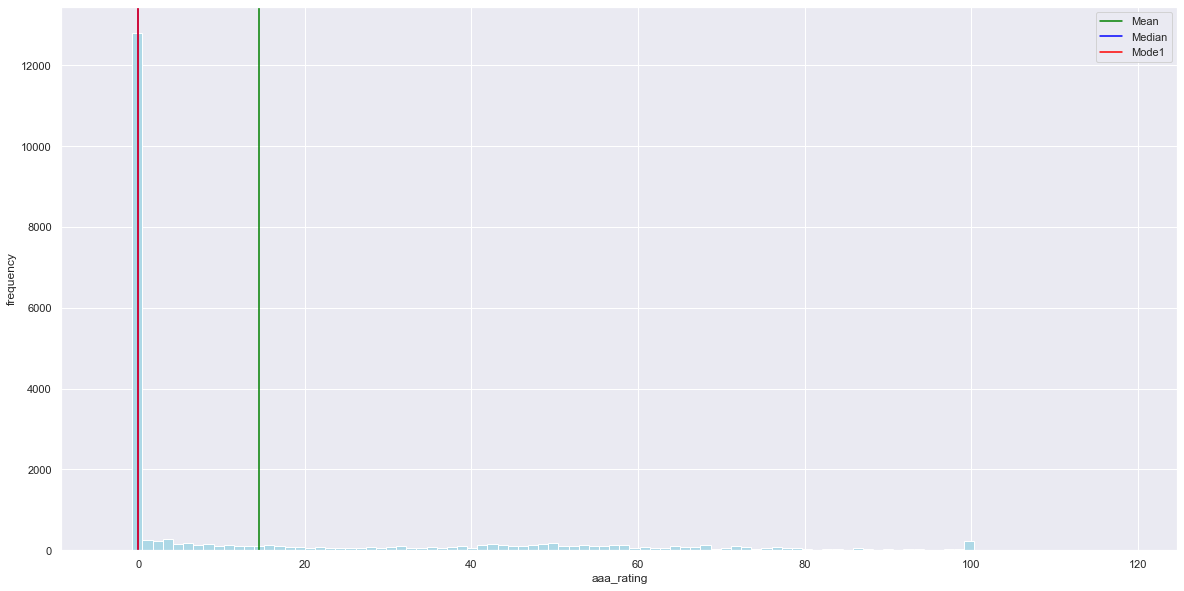

In [29]:
mean=gs_df1['aaa_rating'].mean()
median=gs_df1['aaa_rating'].median()
mode=gs_df1['aaa_rating'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(20,10)) # set the figure size
plt.hist(gs_df1['aaa_rating'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')

plt.xlabel('aaa_rating')   # label the x-axis
plt.ylabel('frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()
warnings.filterwarnings('ignore')

In [30]:
gs_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
tag,20000.0,140262.491600,65843.341729,26000.00,83505.50,140547.50,197292.50,253763.00
greatstone_rating,20000.0,2.839750,1.277439,0.00,2.00,3.00,4.00,5.00
aaa_rating,20000.0,14.432380,25.514962,-3.15,0.00,0.00,17.96,118.65
aa_rating,20000.0,4.222367,11.205798,-0.19,0.00,0.00,3.00,85.68
a_rating,20000.0,5.065125,9.286836,0.00,0.00,0.00,8.35,72.87
...,...,...,...,...,...,...,...,...
10_years_alpha_category,20000.0,0.000962,0.027695,-0.11,-0.02,0.00,0.01,0.10
10_years_beta_category,20000.0,0.009029,0.005437,-0.02,0.01,0.01,0.01,0.12
10years_category_std,20000.0,0.108825,0.055527,0.00,0.06,0.12,0.15,0.34
10_years_return_mean_annual_fund,20000.0,0.561808,0.552907,-3.64,0.00,0.49,1.06,3.28


In [31]:
gs_df1["aaa_rating"].quantile(0.75) - gs_df1["aaa_rating"].quantile(0.25)

17.959999999999997

In [32]:
gs_df1["aa_rating"].quantile(0.75) - gs_df1["aa_rating"].quantile(0.25)

3.0

In [33]:
gs_df1["a_rating"].quantile(0.75) - gs_df1["a_rating"].quantile(0.25)

8.35

In [34]:
gs_df1["bbb_rating"].quantile(0.75) - gs_df1["bbb_rating"].quantile(0.25)

11.34

In [35]:
gs_df1["bb_rating"].quantile(0.75) - gs_df1["bb_rating"].quantile(0.25)

2.41

In [36]:
gs_df1["b_rating"].quantile(0.75) - gs_df1["b_rating"].quantile(0.25)

0.68

In [37]:
gs_df1["below_b_rating"].quantile(0.75) - gs_df1["below_b_rating"].quantile(0.25)

0.1

In [38]:
gs_df1["others_rating"].quantile(0.75) - gs_df1["others_rating"].quantile(0.25)

0.34

In [39]:
gs_df1["greatstone_rating"].quantile(0.75) - gs_df1["greatstone_rating"].quantile(0.25)

2.0

Text(0.7, 555, 'IQR')

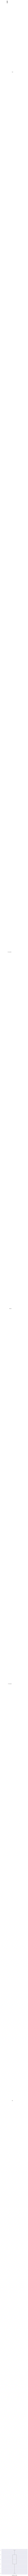

In [40]:
gs_df1.boxplot(column="greatstone_rating",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=350.00, s="3rd Quartile")
plt.text(x=0.8, y=273.00, s="Median")
plt.text(x=0.75, y=192.00, s="1st Quartile")
plt.text(x=0.9, y=102.00, s="Min")
plt.text(x=0.9, y=540.00, s="Max")
plt.text(x=0.7, y=555, s="IQR", rotation=90, size=25)

Text(0.7, 365, 'IQR')

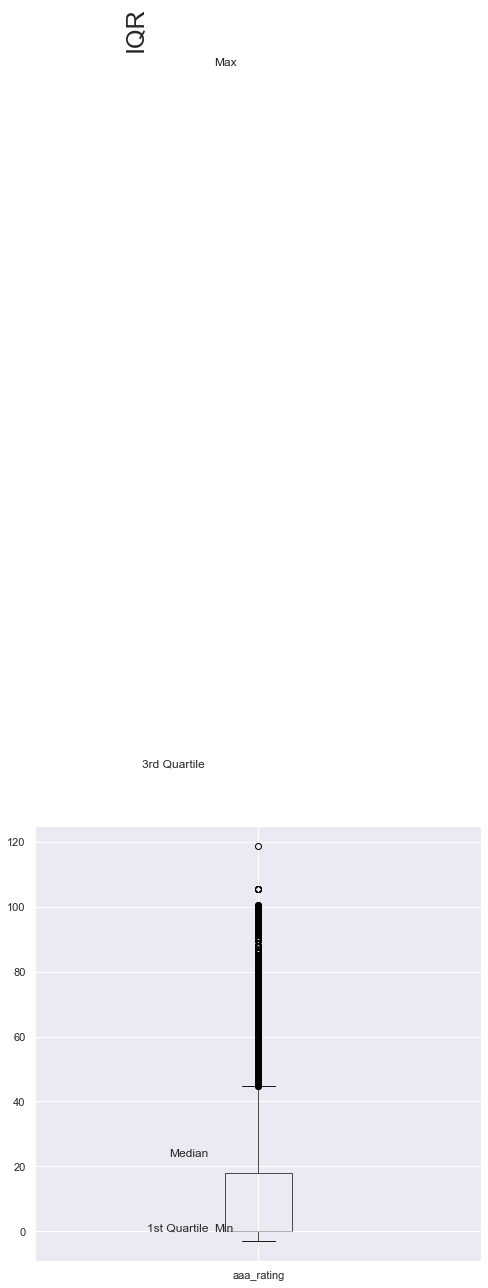

In [42]:
gs_df1.boxplot(column="aaa_rating",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=143.00, s="3rd Quartile")
plt.text(x=0.8, y=23.00, s="Median")
plt.text(x=0.75, y=0.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=359.00, s="Max")
plt.text(x=0.7, y=365, s="IQR", rotation=90, size=25)

Text(0.7, 365, 'IQR')

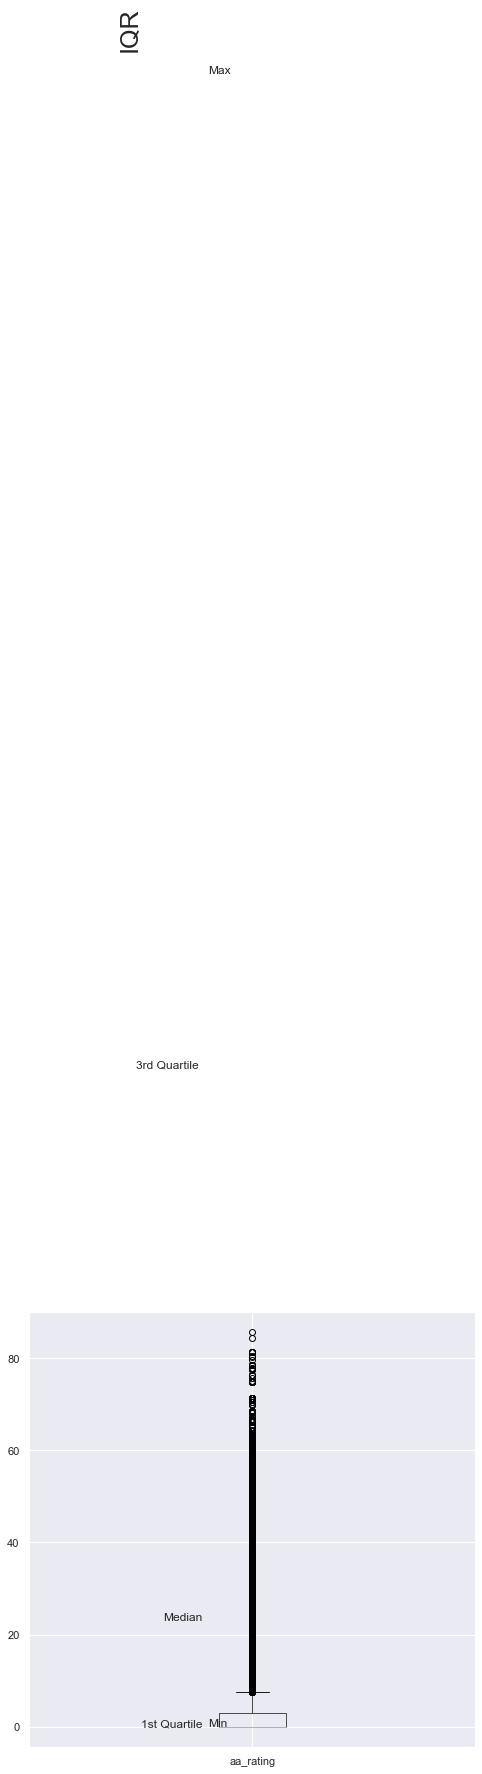

In [43]:
gs_df1.boxplot(column="aa_rating",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=143.00, s="3rd Quartile")
plt.text(x=0.8, y=23.00, s="Median")
plt.text(x=0.75, y=0.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=359.00, s="Max")
plt.text(x=0.7, y=365, s="IQR", rotation=90, size=25)

Text(0.7, 365, 'IQR')

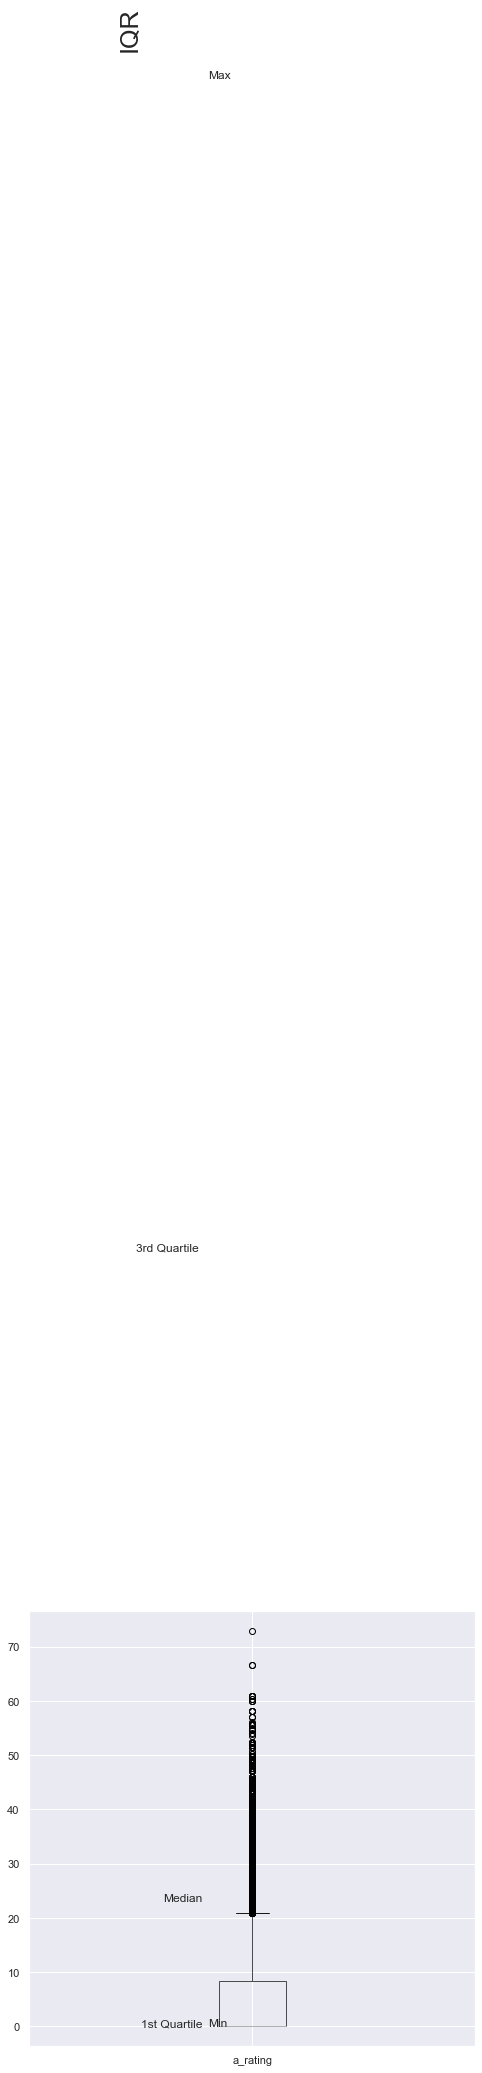

In [44]:
gs_df1.boxplot(column="a_rating",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=143.00, s="3rd Quartile")
plt.text(x=0.8, y=23.00, s="Median")
plt.text(x=0.75, y=0.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=359.00, s="Max")
plt.text(x=0.7, y=365, s="IQR", rotation=90, size=25)

Text(0.7, 365, 'IQR')

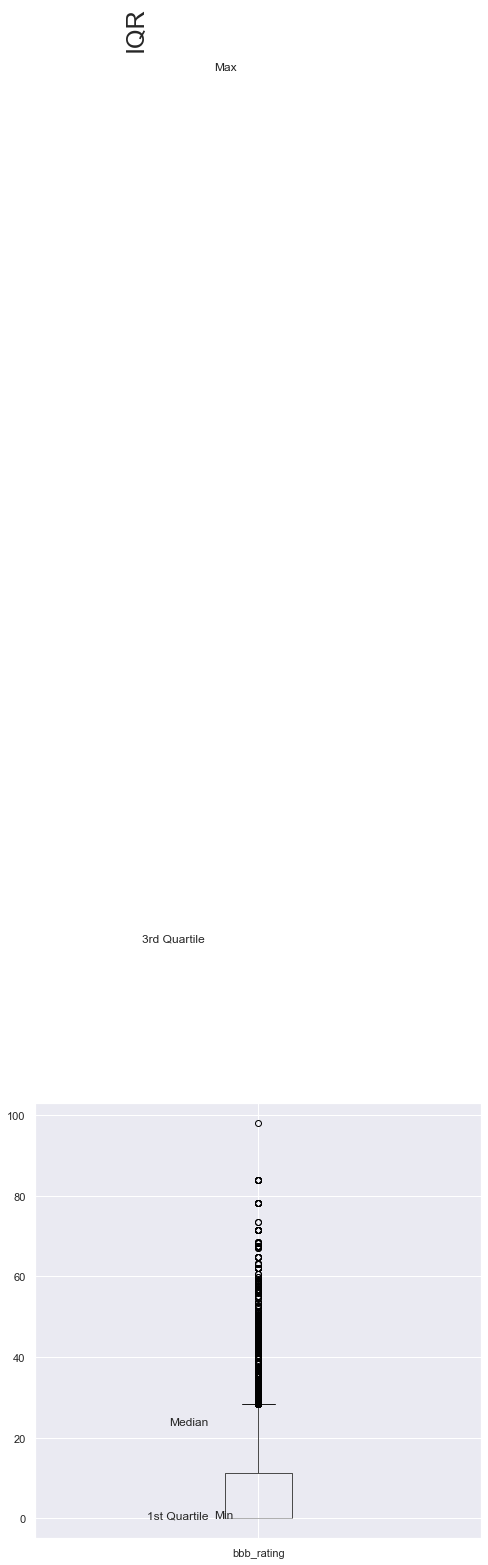

In [45]:
gs_df1.boxplot(column="bbb_rating",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=143.00, s="3rd Quartile")
plt.text(x=0.8, y=23.00, s="Median")
plt.text(x=0.75, y=0.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=359.00, s="Max")
plt.text(x=0.7, y=365, s="IQR", rotation=90, size=25)

Text(0.7, 365, 'IQR')

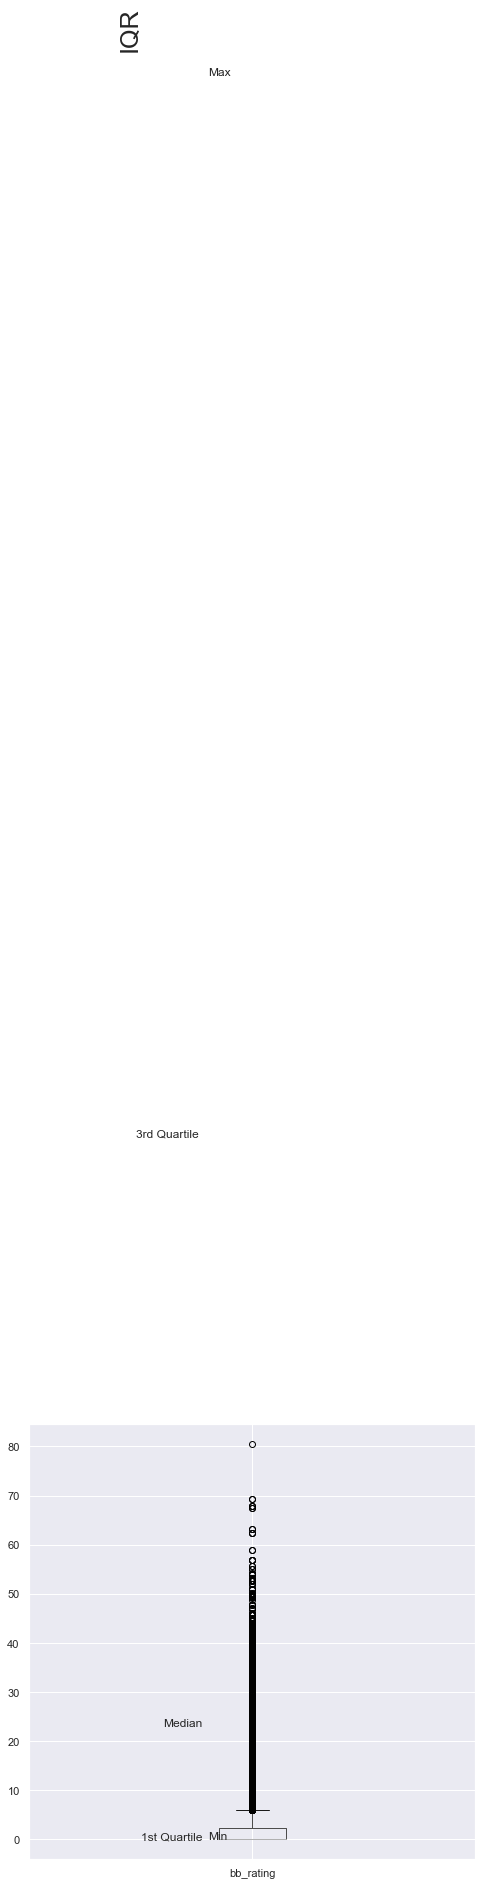

In [46]:
gs_df1.boxplot(column="bb_rating",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=143.00, s="3rd Quartile")
plt.text(x=0.8, y=23.00, s="Median")
plt.text(x=0.75, y=0.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=359.00, s="Max")
plt.text(x=0.7, y=365, s="IQR", rotation=90, size=25)

Text(0.7, 365, 'IQR')

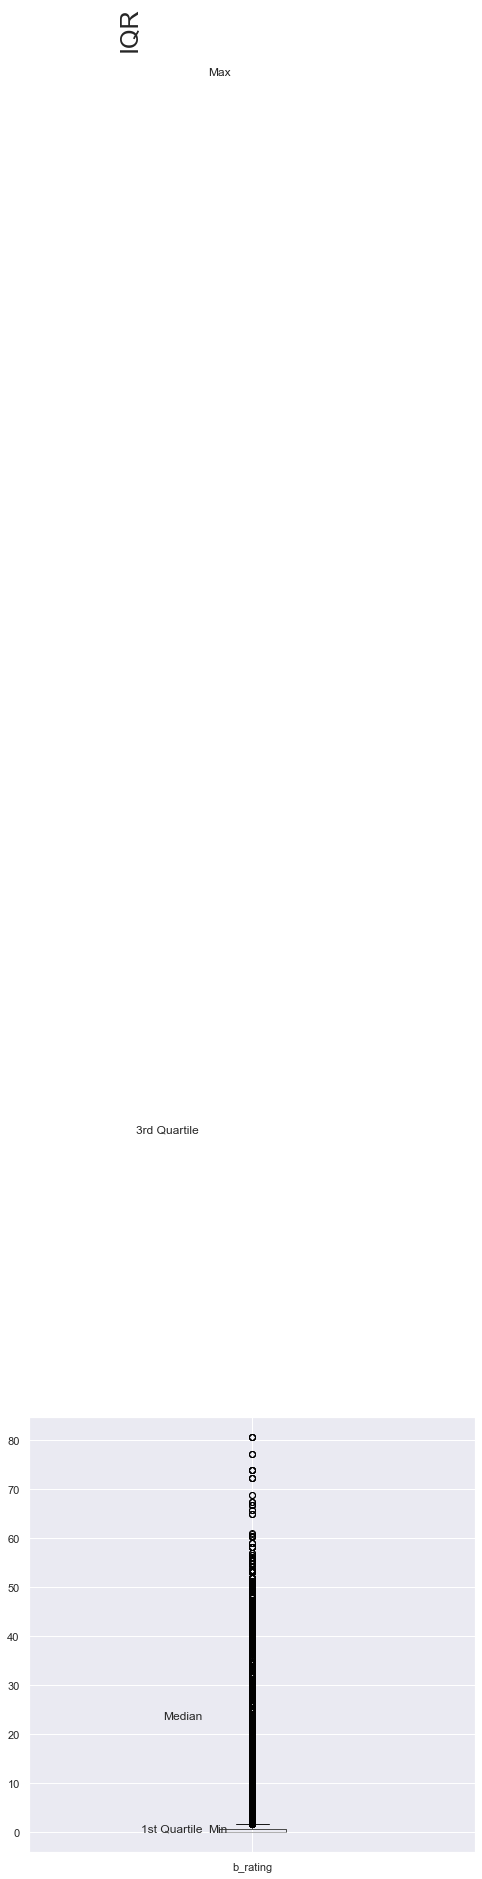

In [47]:
gs_df1.boxplot(column="b_rating",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=143.00, s="3rd Quartile")
plt.text(x=0.8, y=23.00, s="Median")
plt.text(x=0.75, y=0.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=359.00, s="Max")
plt.text(x=0.7, y=365, s="IQR", rotation=90, size=25)

Text(0.7, 365, 'IQR')

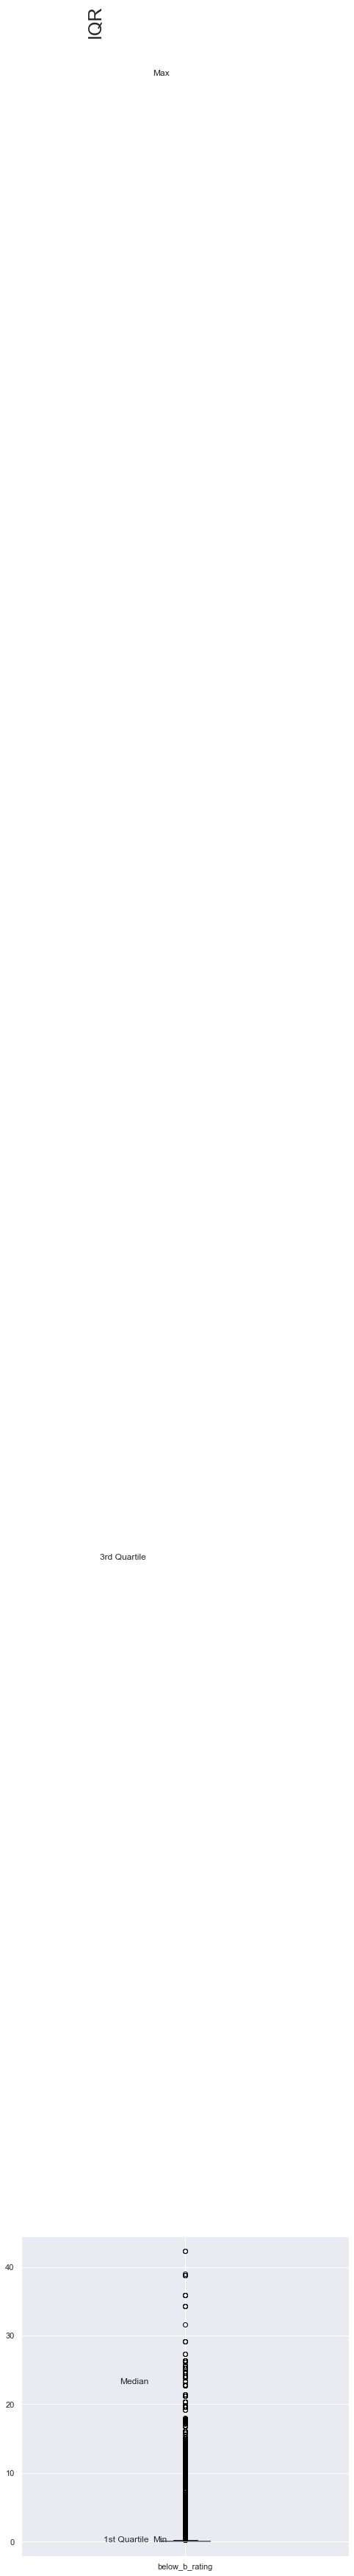

In [48]:
gs_df1.boxplot(column="below_b_rating",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=143.00, s="3rd Quartile")
plt.text(x=0.8, y=23.00, s="Median")
plt.text(x=0.75, y=0.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=359.00, s="Max")
plt.text(x=0.7, y=365, s="IQR", rotation=90, size=25)

Text(0.7, 365, 'IQR')

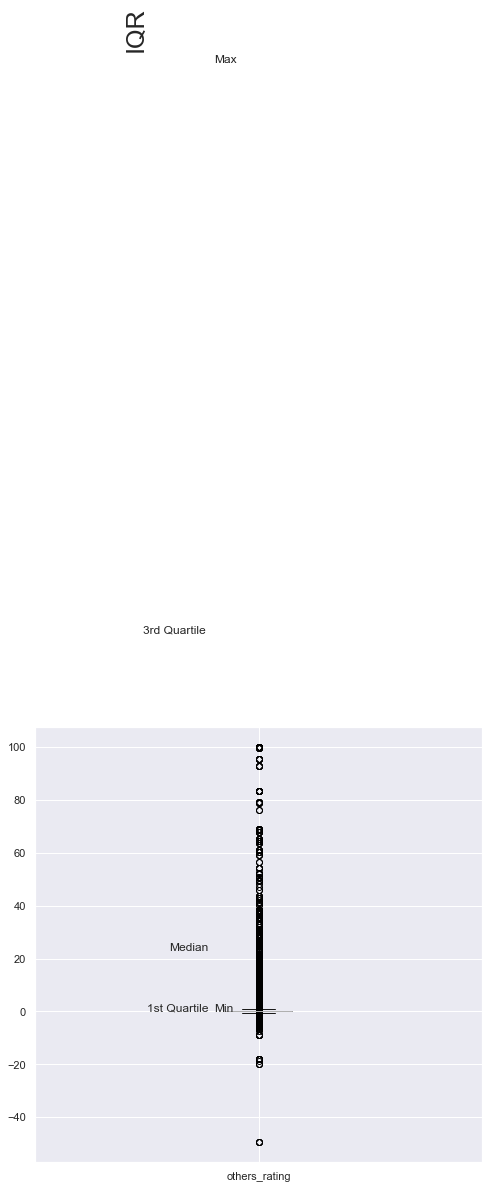

In [49]:
gs_df1.boxplot(column="others_rating",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=143.00, s="3rd Quartile")
plt.text(x=0.8, y=23.00, s="Median")
plt.text(x=0.75, y=0.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=359.00, s="Max")
plt.text(x=0.7, y=365, s="IQR", rotation=90, size=25)

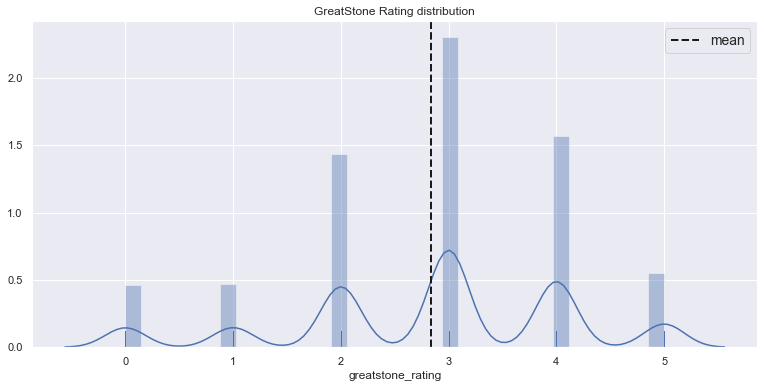

In [50]:
plt.figure(figsize=(13,6))
#using distplot() to draw a kernel density estimate line 
sns.distplot(gs_df1["greatstone_rating"],color="b",rug=True)
#axvline() to plot mean line 
plt.axvline(gs_df1["greatstone_rating"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("GreatStone Rating distribution")
plt.show()

In [51]:
gs_df1.cov() 

,tag,greatstone_rating,aaa_rating,aa_rating,a_rating,bbb_rating,bb_rating,b_rating,below_b_rating,others_rating,maturity_bond,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,fund_ratio_net_annual_expense,pb_ratio,total_assets,yield,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio.1,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating.1,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years.1,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
tag,4.335346e+09,86.493804,89172.179990,-4364.714341,9838.090603,15609.522648,-14313.079683,-15361.907677,1604.290117,1600.767531,6552.266485,7782.331226,4566.694697,4520.035487,15730.232524,10397.704566,-992.851085,-14575.196398,2584.106356,-6380.546501,-4287.210083,4716.223113,17865.883744,-1542.051949,678.033677,6.857679e+13,-781.463292,3361.947122,3196.769471,-2933.128267,13599.403493,5849.597540,12197.627567,10681.066913,1806.926320,3517.162528,3504.276768,-1384.279971,-1618.081830,11690.015462,2417.728623,168.574511,678.033677,-7029.174245,6293.344300,5990.833637,-4073.893603,168.574511,6260.419722,7658.896026,6919.456552,3950.989385,1543.212884,16741.834043,4993.284189,806.285478,2798.975034,8188.639797,86.493804,-1672.268261,9386.083343,787.040303,-13678.169269,-2972.551038,11151.952860,11490.111447,-3966.783421,-8.213568,569.445564,80.771501,375.270500,654.207240,72710.716793,7386.208943,-1.707174,4993.284189,-37.979189,4.985933,3.298593,660.597709,2101.417300,626.610012,240.922381,-2852.012603,6452.218052,5506.735888,1.490618e+01,-112.150597,226.624584,10.387146,75.547340,2447.431141,-25.891646,-1.573394,-13.950592,5959.232031,261.425713,345.741304,-2005.464355,12148.241814,13052.579620,-2.570636,-733.920483,-1.330149,-660.317557,4507.396764,-40.818132,-3.415614,-39.080832,370.582635,2365.653780
greatstone_rating,8.649380e+01,1.631852,0.886371,0.624145,0.703662,0.816229,0.435636,0.567635,0.212454,0.313464,0.530270,0.279963,-0.053748,0.235935,-0.028781,1.159102,-0.004313,0.007756,-0.083630,0.340416,0.064001,0.038766,0.447417,-0.188573,0.197601,2.683341e+09,0.193222,0.8

# Feature Engineering Techniques

In [ ]:
#Seperating input variables from target column

#X = ccs_df4.iloc[:,:-1]         # Features - All columns but last
#Y = ccs_df4.iloc[:,-1]          # Target - Last Column

gs_df1 = pd.read_csv("GSMF_train.csv")
gs_df2 = pd.read_csv("GSMF_test.csv")

In [ ]:
print ("Number of rows in training dataset = {}".format(gs_df1.shape[0]))
print ("Number of columns in training dataset = {}".format(gs_df1.shape[1]))

In [ ]:
print ("Number of rows in testing dataset = {}".format(test_df.shape[0]))
print ("Number of columns in testing dataset = {}".format(test_df.shape[1]))

In [ ]:
#Check for highly correlated variables

cor= ccs_df4.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.55) | (cor< -0.55)]

In [ ]:
#Drop irrelavent data
ccs_df4=ccs_df4.drop(["superplastic","water"],axis=1)

In [ ]:
ccs_df4.head(5)

In [ ]:
req_col_names = ["Cem", "Sla", "Ash", "Wat", "Coa", "Fin", "Age", "CCS"]
curr_col_names = list(ccs_df4.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = ccs_df4.rename(columns=mapper)

In [ ]:
#Split data in 3 datasets of train, test and validation set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

In [6]:
#Scale the data to reduce dimensions
#The scaler is fit on the training data and not on testing data to avoid loss of performance

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: name 'X_train' is not defined

#Try Linear model and check R-squared & Mean Square Error 

In [ ]:
#X = ccs_df4[['strength']]
#Y = ccs_df4['cement']

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

In [ ]:
# Train R^2
print(regression_model.score(X_train, Y_train))

In [ ]:
# Test R^2
print(regression_model.score(X_test, Y_test))

In [ ]:
# Train MSE
predictedCCS = regression_model.predict(X_train)
print(mean_squared_error(predictedCCS, Y_train))

In [ ]:
# Test MSE
predictedCCS = regression_model.predict(X_test)
print(mean_squared_error(predictedCCS, Y_test))

In [ ]:
poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_train = poly.fit_transform(X_train)
xPoly_train[0:2]

In [ ]:
X.head(5)

In [ ]:
regression_modelP2 = regression_model.fit(xPoly_train, Y_train)

In [ ]:
# Train R^2
print(regression_modelP2.score(xPoly_train, Y_train))

In [ ]:
poly = PolynomialFeatures( degree = 3, include_bias = False) 
xPoly_train = poly.fit_transform(X_train)
regression_modelPnew = regression_model.fit(xPoly_train, Y_train)
# Train R^2
print(regression_modelPnew.score(xPoly_train, Y_train))

#Evaluate using K-fold cross validation

In [7]:
seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

NameError: name 'model_selection' is not defined

In [ ]:
model = LinearRegression()

In [ ]:
X.head()

In [ ]:
results = model_selection.cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=kfold)
print("Results: %.2f (%.2f) MSE" % (-results.mean(), results.std()))

#Feature Selection

In [ ]:
X = ccs_df4.drop('strength', axis = 1)
Y = ccs_df4['strength']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

In [ ]:
X.shape

In [ ]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()

In [ ]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=5, forward=True, scoring='r2', cv=5)

In [ ]:
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [ ]:
sfs1.get_metric_dict()

In [8]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [ ]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

In [ ]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

#Build Model on selected features

In [ ]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

In [ ]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

In [ ]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

#Linear Regression is not useful in this case, since the accuracy is pretty low

# Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Let's compare 3 different models

# Elasticnet Regression
elast = ElasticNet()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
elast.fit(X_train, Y_train)
lasso.fit(X_train, Y_train)
ridge.fit(X_train, Y_train)

# Making predictions on Test data
Y_pred_elast = elast.predict(X_test)
Y_pred_lasso = lasso.predict(X_test)
Y_pred_ridge = ridge.predict(X_test)

#Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score

In [ ]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""ElasticNet      \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_elast)),mean_squared_error(Y_test, Y_pred_elast),
            mean_absolute_error(Y_test, Y_pred_elast), r2_score(Y_test, Y_pred_elast)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)),mean_squared_error(Y_test, Y_pred_lasso),
            mean_absolute_error(Y_test, Y_pred_lasso), r2_score(Y_test, Y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_ridge)),mean_squared_error(Y_test, Y_pred_ridge),
            mean_absolute_error(Y_test, Y_pred_ridge), r2_score(Y_test, Y_pred_ridge)))

#Performance is almost similar across the 3 algorithms. However, Ridge gives better results.

In [ ]:
#Plotting coefficients 

coeff_elast = elast.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = np.arange(1)

X = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,4))
rects1 = ax.bar(X - 2*(width/2), coeff_elast, width, label='Elnet')
rects2 = ax.bar(X, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(X + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(X)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

#Check error in labels above

#ElasticNet keeps coefficients quite low, hence better than Lasso or Ridge Regression 

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(Y_pred_elast, Y_test, s=20)
ax1.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("ElasticNet Regression")

ax2.scatter(Y_pred_lasso, Y_test, s=20)
ax2.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(Y_pred_ridge, Y_test, s=20)
ax3.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

#Looking at the graphs between predicted and true values of the target variable, we can conclude that ElasticNet and Ridge Regression perform well as the predictions are closer to the actual values. 
#Lasso Regression is to be rejected just as Linear Regression.
#(The closer the points are to the black line, the less the error is.)

#We can use Decision Trees to improve model performance, since features distribution are loosely packed.  

In [9]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

dtr.fit(X_train, Y_train)

Y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_dtr)),mean_squared_error(Y_test, Y_pred_dtr),
            mean_absolute_error(Y_test, Y_pred_dtr), r2_score(Y_test, Y_pred_dtr)))

plt.scatter(Y_test, Y_pred_dtr)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

NameError: name 'X_train' is not defined

#The Root Mean Squared Error (RMSE) has come down from 11.88 to 7.52, so the Decision Tree Regressor has improved the performance by a significant amount. 
#This can be observed in the plot since more points are closer to or on the line.

#Now, we can try Random Forest Regressor as it trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, Y_train)

Y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_rfr)),mean_squared_error(Y_test, Y_pred_rfr),
            mean_absolute_error(Y_test, Y_pred_rfr), r2_score(Y_test, Y_pred_rfr)))

plt.scatter(Y_test, Y_pred_rfr)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

#The RMSE with Random Forest Regressor is now 6.20 by reduing the error via ensembling multiple trees.

#Feature importances for Decision Tree and Random Forest

In [ ]:
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_

labels = np.arange(1)

X = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(X -(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(X +(width/2), feature_rfr, width, label='Random Forest')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(X)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

#Check label error

#Cement and Age seem to be the most important features by tree based models. 
#Flyash, Coarse and Fine aggregates are least important factors.

#Result comparison for all models

In [ ]:
models = [elast, lasso, ridge, dtr, rfr]
names = ["Elastic Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(Y_test, model.predict(X_test))))

X = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(X, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(X)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

# Random Forest Regressor Model is the best choice for prediction of Concrete Compressive Strength

# Two points to be noted are:
#1 - Outliers from the target column "Concrete/Cement Compressive Strength" have not been dropped/replaced, since it would beat the basic purpose of building the model as far as real world application is concerned.
#2 - Linear Regression has been rejected even before model building due to very low accuracy score. Further, a concrete mixture doesn't follow a linear algorithm in practical sense.  